# R0 Analysis of COVID-19
22 March 2020

Cecilia García López de Munain

## Libraries

In [20]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import pickle
from datetime import timedelta
import datetime

## Parameters

In [21]:
sys.path.append('./')

In [22]:
PATH_ROOT_INPUT_DATA = 'data\\input'
PATH_ROOT_INTERIM_DATA = 'data\\interim'
INTERIM_DATA_NAME_COVID = 'covid_19_data_cum.pkl'
INTERIM_DATA_NAME_GOVM = 'government_measures.csv'

## Import Data

COVID Data

In [23]:
covid19_data = pickle.load(open(os.path.join(PATH_ROOT_INTERIM_DATA,INTERIM_DATA_NAME_COVID), "rb" ))

In [24]:
covid19_data.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density
DateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,9942334.0,120.265320
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,5638676.0,7952.998418
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,209469333.0,25.061716
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,4137309.0,232.172222


In [25]:
covid19_data.columns

Index(['Day', 'Month', 'Year', 'NewConfCases', 'NewDeaths', 'CountryExp',
       'GeoId', 'NewConfCases_cum', 'NewDeaths_cum', 'Population',
       'Population Density'],
      dtype='object')

In [26]:
# Not studying conveyance Japan so dropping it 
covid19_data = covid19_data.loc[covid19_data['CountryExp'] != 'Cases on an international conveyance Japan',:]

In [27]:
list(covid19_data['CountryExp'].sort_values().unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia_and_Herzegovina',
 'Brazil',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'CANADA',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Cases_on_an_international_conveyance_Japan',
 'Cayman_Islands',
 'Central_African_Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa_Rica',
 'Cote_dIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech_Republic',
 'Democratic_Republic_of_the_Congo',
 'Denmark',
 'Djibouti',
 'Dominican_Republic',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe_Islands',
 'Fiji',
 'Finland',
 'France',
 'French_Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greec

Government Measures Data

In [28]:
gov_measures = pd.read_csv(os.path.join(PATH_ROOT_INPUT_DATA, INTERIM_DATA_NAME_GOVM))

In [29]:
gov_measures.head()

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42


## Join datasets

In [30]:
# Filter countries in Government Measures
covid19_data_filtered = covid19_data.loc[covid19_data.loc[:,'CountryExp'].isin(list(gov_measures.loc[:,'CountryExp'].unique()))]

covid19_data_filtered = covid19_data_filtered.loc[covid19_data_filtered.loc[:,'NewConfCases']>0,'CountryExp'].reset_index().groupby('CountryExp').min()

In [31]:
covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')

In [32]:
# covid19_data_filtered = covid19_data_filtered.merge(gov_measures, on='CountryExp', how='left')
# covid19_data_filtered.loc[:,'DateRep'] 

covid19_data_filtered.loc[:,'DayOfGovM'] = covid19_data_filtered.loc[:,'DateRep'] + pd.to_timedelta(covid19_data_filtered.loc[:,'DaysFromFirst'], unit='D')

In [33]:
covid19_data_filtered.head(20)

,CountryExp,DateRep,Government Measure,DaysFromFirst,DayOfGovM
0,China,2019-12-31,Recomendación de aislamiento,23,2020-01-23
1,China,2019-12-31,Limitaciones drásticas al transporte,24,2020-01-24
2,China,2019-12-31,Cierre de espectáculos,24,2020-01-24
3,China,2019-12-31,Cierre de escuelas,27,2020-01-27
4,China,2019-12-31,Bloqueo de ciudades afectadas,34,2020-02-03
5,China,2019-12-31,Apertura de clases en algunas provincias,72,2020-03-12
6,France,2020-01-25,Cierre de espectáculos,43,2020-03-08
7,France,2020-01-25,Recomendación de aislamiento,51,2020-03-16
8,France,2020-01-25,Licencias y home office,51,2020-03-16
9,France,2020-01-25,Cierre de escuelas,51,2020-03-16


In [34]:
covid19_data_withgovm = pd.merge(covid19_data.reset_index(), covid19_data_filtered.loc[:,['CountryExp','Government Measure','DayOfGovM','DaysFromFirst']], left_on=['CountryExp','DateRep'], right_on=['CountryExp','DayOfGovM'], how='left').set_index('DateRep')

In [35]:
covid19_data_withgovm.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,North_Macedonia,MK,0,0,NaN,NaN,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Azerbaijan,AZ,0,0,9942334.0,120.265320,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Singapore,SG,0,0,5638676.0,7952.998418,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Brazil,BR,0,0,209469333.0,25.061716,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Kuwait,KW,0,0,4137309.0,232.172222,NaN,NaT,NaN


In [36]:
covid19_data_withgovm = covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp'].isin(covid19_data_filtered.loc[:,'CountryExp']),:]

## Analyse mesures

In [37]:
gov_measures.head(30)

,CountryExp,Government Measure,DaysFromFirst
0,Spain,Alerta Epidemiológica,6
1,Spain,Supervisión de ingreso de pasajeros,36
2,Spain,Cierre de escuelas,41
3,Spain,Licencias y home office,41
4,Spain,Cierre de espectáculos,42
5,Spain,Restricciones al transporte público,46
6,Spain,Limitaciones drásticas al transporte,48
7,Italy,Recomendación de aislamiento,1
8,Italy,Bloqueo de ciudades afectadas,23
9,Italy,Cierre de escuelas,35


In [39]:
list_of_measures = gov_measures.loc[:,'Government Measure'].unique()
list_of_countries =  covid19_data_withgovm.loc[:,'CountryExp'].unique()
print(list_of_measures)
print(list_of_countries)

['Alerta Epidemiológica' 'Supervisión de ingreso de pasajeros'
 'Cierre de escuelas' 'Licencias y home office' 'Cierre de espectáculos'
 'Restricciones al transporte público'
 'Limitaciones drásticas al transporte' 'Recomendación de aislamiento'
 'Bloqueo de ciudades afectadas' 'Cierre de fronteras'
 'Apertura de clases en algunas provincias']
['China' 'Italy' 'Spain' 'France']


In [40]:
[(x,y) for x in ['Cierre de escuelas', 'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

[('Cierre de escuelas', 'China'),
 ('Cierre de escuelas', 'Italy'),
 ('Cierre de escuelas', 'Spain'),
 ('Cierre de escuelas', 'France'),
 ('Cierre de espectáculos', 'China'),
 ('Cierre de espectáculos', 'Italy'),
 ('Cierre de espectáculos', 'Spain'),
 ('Cierre de espectáculos', 'France'),
 ('Limitaciones drásticas al transporte', 'China'),
 ('Limitaciones drásticas al transporte', 'Italy'),
 ('Limitaciones drásticas al transporte', 'Spain'),
 ('Limitaciones drásticas al transporte', 'France')]

In [41]:
measures_countries =  [(x,y) for x in ['Cierre de escuelas',  'Cierre de espectáculos', 'Limitaciones drásticas al transporte'] for y in list_of_countries]

c:\users\c.lopez.de.munain\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Cierre de escuelas en  China  : 2020-01-27T00:00:00.000000000 con  2775 casos confirmados.
Cierre de escuelas en  Italy  : 2020-03-06T00:00:00.000000000 con  3858 casos confirmados.
Cierre de escuelas en  Spain  : 2020-03-13T00:00:00.000000000 con  3004 casos confirmados.
Cierre de escuelas en  France  : 2020-03-16T00:00:00.000000000 con  5423 casos confirmados.
Cierre de espectáculos en  China  : 2020-01-24T00:00:00.000000000 con  882 casos confirmados.
Cierre de espectáculos en  Italy  : 2020-03-06T00:00:00.000000000 con  3858 casos confirmados.
Cierre de espectáculos en  Spain  : 2020-03-14T00:00:00.000000000 con  4231 casos confirmados.
Cierre de espectáculos en  France  : 2020-03-08T00:00:00.000000000 con  716 casos confirmados.
Limitaciones drásticas al transporte en  China  : 2020-01-24T00:00:00.000000000 con  882 casos confirmados.
Limitaciones drásticas al transporte en  Italy  : 2020-03-11T00:00:00.000000000 con  10149 casos confirmados.
Limitaciones drásticas al transporte e

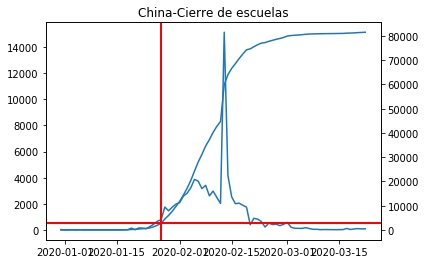

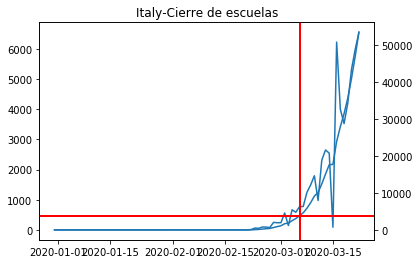

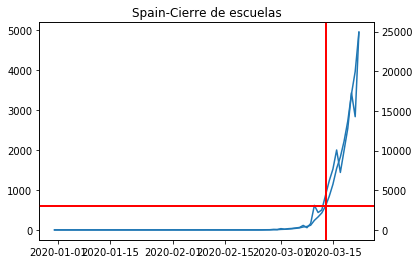

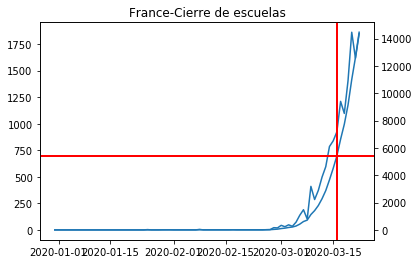

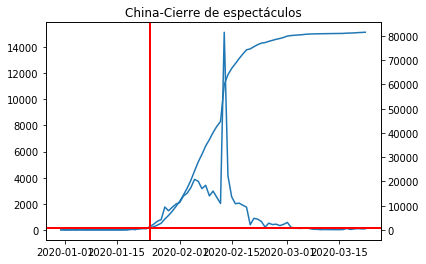

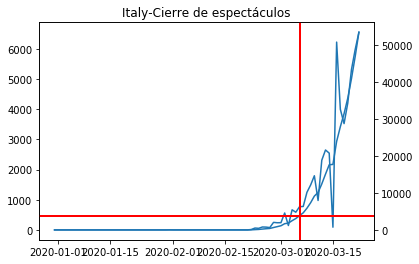

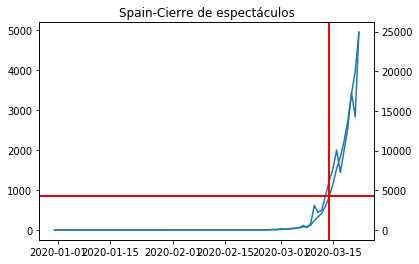

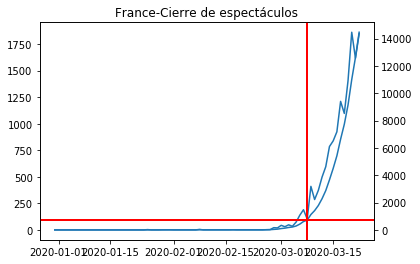

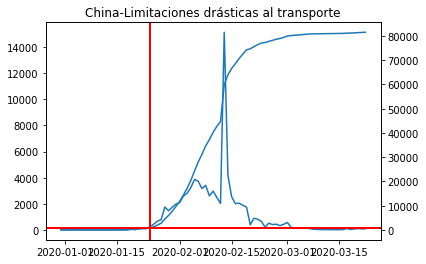

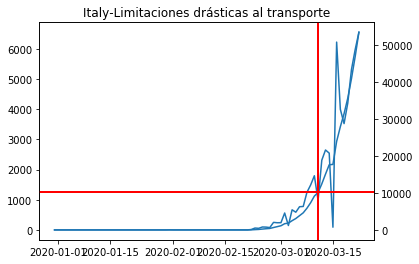

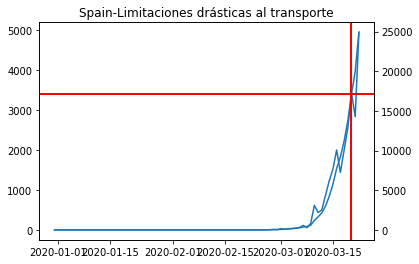

In [43]:
for measure, country in measures_countries:
    
    event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure) & (covid19_data_withgovm.loc[:,'CountryExp']==country),'NewConfCases_cum']
    if len(event)>0:

        fig, ax1 = plt.subplots()

        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases'])

        ax2 = ax1.twinx()

        ax2.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'NewConfCases_cum'])

        print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'casos confirmados.')

        plt.axvline(x=event.index, linewidth=2, color='r') 
        plt.axhline(y=event.values, linewidth=2, color='r') 

        plt.title(country + '-' + measure)

## Determine the effect on the exponential

In [44]:
covid19_data_withgovm.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Government Measure,DayOfGovM,DaysFromFirst
DateRep,,,,,,,,,,,,,,
2019-12-31,31,12,2019,27,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Italy,IT,0,0,6.043128e+07,205.450748,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,Spain,ES,0,0,4.672375e+07,93.529058,NaN,NaT,NaN
2019-12-31,31,12,2019,0,0,France,FR,0,0,6.698724e+07,122.338396,NaN,NaT,NaN
2020-01-01,1,1,2020,0,0,Spain,ES,0,0,4.672375e+07,93.529058,NaN,NaT,NaN


### Funtions

In [45]:
def compute_growth_3days(df):
    '''This function computes the proportion in which the total confirmed cases increase each 3 days'''
    
    df.loc[:,'Growth3Days'] = np.nan
    df.sort_values(['CountryExp','DateRep'], inplace=True)
    df.loc[:,'Growth3Days'] = df.loc[:,'NewConfCases_cum'] / df.shift(3).loc[:,'NewConfCases_cum'].where(
        cond=(df.loc[:,'CountryExp'] == df.shift(3).loc[:,'CountryExp']) & (df.shift(3).loc[:,'NewConfCases_cum'] > 0)
    )
    df.sort_index(inplace=True)
    return df

In [46]:
compute_growth_3days(covid19_data_withgovm)

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Government Measure,DayOfGovM,DaysFromFirst,Growth3Days
DateRep,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,27,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,Italy,IT,0,0,6.043128e+07,205.450748,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,France,FR,0,0,6.698724e+07,122.338396,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,Spain,ES,0,0,4.672375e+07,93.529058,NaN,NaT,NaN,NaN
2020-01-01,1,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaT,NaN,NaN
2020-01-01,1,1,2020,0,0,Italy,IT,0,0,6.043128e+07,205.450748,NaN,NaT,NaN,NaN
2020-01-01,1,1,2020,0,0,Spain,ES,0,0,4.672375e+07,93.529058,NaN,NaT,NaN,NaN
2020-01-01,1,1,2020,0,0,France,FR,0,0,6.698724e+07,122.338396,NaN,NaT,NaN,NaN
2020-01-02,2,1,2020,0,0,Italy,IT,0,0,6.043128e+07,205.450748,NaN,NaT,NaN,NaN


Cierre de escuelas en  China  : 2020-01-27T00:00:00.000000000 con  3.1462585034013606 veces casos que hace tres días.
Cierre de escuelas en  Italy  : 2020-03-06T00:00:00.000000000 con  2.1024523160762945 veces casos que hace tres días.
Cierre de escuelas en  Spain  : 2020-03-13T00:00:00.000000000 con  2.495016611295681 veces casos que hace tres días.
Cierre de escuelas en  France  : 2020-03-16T00:00:00.000000000 con  1.2053789731051345 veces casos que hace tres días.
Cierre de espectáculos en  China  : 2020-01-24T00:00:00.000000000 con  1.6768060836501901 veces casos que hace tres días.
Cierre de espectáculos en  Italy  : 2020-03-06T00:00:00.000000000 con  1.5419664268585132 veces casos que hace tres días.
Cierre de espectáculos en  Spain  : 2020-03-14T00:00:00.000000000 con  1.9771028037383178 veces casos que hace tres días.
Cierre de espectáculos en  France  : 2020-03-08T00:00:00.000000000 con  2.512280701754386 veces casos que hace tres días.
Limitaciones drásticas al transporte en 

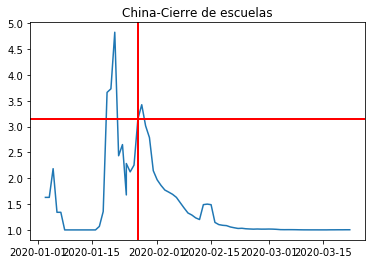

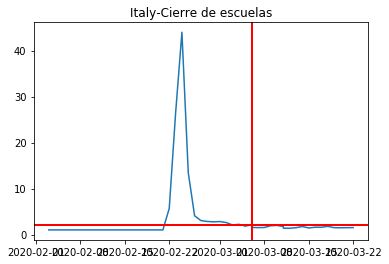

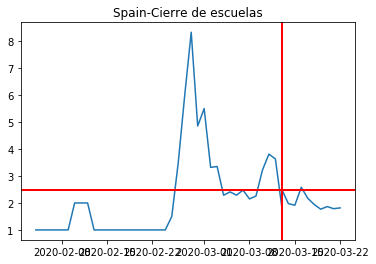

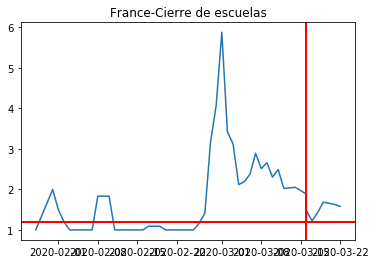

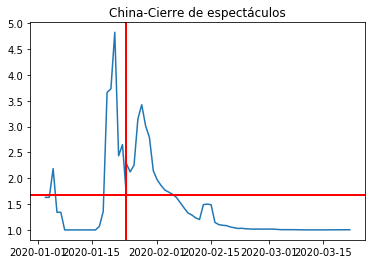

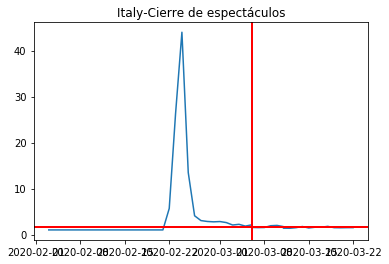

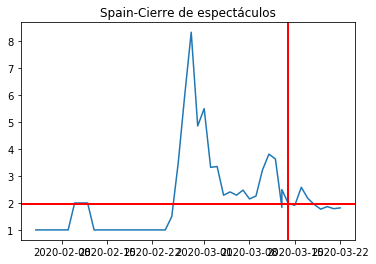

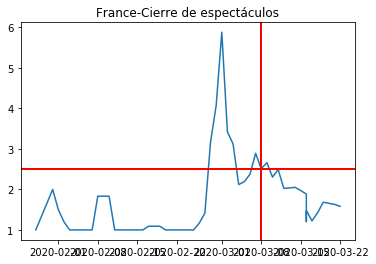

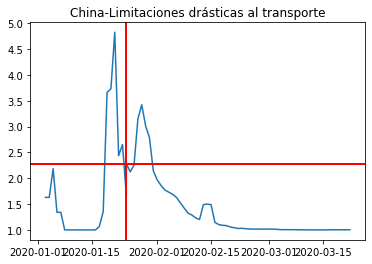

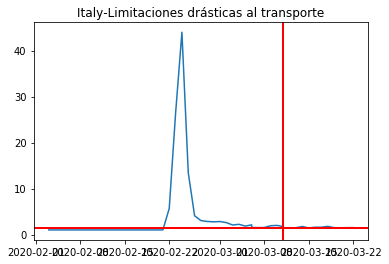

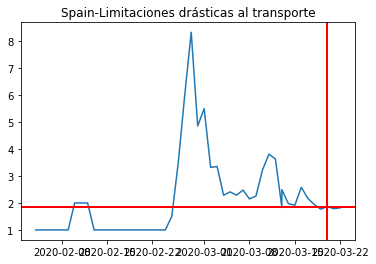

In [48]:
for measure, country in measures_countries:
    
    event = covid19_data_withgovm.loc[(covid19_data_withgovm.loc[:,'Government Measure']==measure) & (covid19_data_withgovm.loc[:,'CountryExp']==country),'Growth3Days']
    if len(event)>0:

        fig, ax1 = plt.subplots()

        ax1.plot(covid19_data_withgovm.loc[covid19_data_withgovm.loc[:,'CountryExp']==country,'Growth3Days'])

        print(measure, 'en ', country,' :', event.index.values[0], 'con ', event.values[0], 'veces casos que hace tres días.')

        plt.axvline(x=event.index, linewidth=2, color='r') 
        plt.axhline(y=event.values, linewidth=2, color='r') 

        plt.title(country + '-' + measure)

In [49]:
covid19_data_withgovm.head()

,Day,Month,Year,NewConfCases,NewDeaths,CountryExp,GeoId,NewConfCases_cum,NewDeaths_cum,Population,Population Density,Government Measure,DayOfGovM,DaysFromFirst,Growth3Days
DateRep,,,,,,,,,,,,,,,
2019-12-31,31,12,2019,27,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,Italy,IT,0,0,6.043128e+07,205.450748,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,France,FR,0,0,6.698724e+07,122.338396,NaN,NaT,NaN,NaN
2019-12-31,31,12,2019,0,0,Spain,ES,0,0,4.672375e+07,93.529058,NaN,NaT,NaN,NaN
2020-01-01,1,1,2020,0,0,China,CN,27,0,1.392730e+09,148.348833,NaN,NaT,NaN,NaN


In [50]:
covid19_data_withmovgrowth = covid19_data_withgovm.reset_index().sort_values(['CountryExp','DateRep'], ascending=True)

In [51]:
covid19_data_withmovgrowth.loc[:,'previous_growth_3d'] = covid19_data_withmovgrowth['Growth3Days'].expanding().mean()

In [52]:
covid19_data_withmovgrowth.loc[:,'forward_growth_3d'] = covid19_data_withmovgrowth.sort_values(['CountryExp','DateRep'], ascending=False)['Growth3Days'].expanding().mean()

In [62]:
mesures_effect = covid19_data_withmovgrowth.loc[~covid19_data_withmovgrowth.loc[:,'Government Measure'].isna(),['DateRep','CountryExp','Government Measure','DaysFromFirst','previous_growth_3d','forward_growth_3d']]

In [63]:
mesures_effect.loc[:,'growth_effect'] = mesures_effect.loc[:,'forward_growth_3d'] / mesures_effect.loc[:,'previous_growth_3d']

In [64]:
mesures_effect

,DateRep,CountryExp,Government Measure,DaysFromFirst,previous_growth_3d,forward_growth_3d,growth_effect
93,2020-01-23,China,Recomendación de aislamiento,23.0,1.754877,2.081991,1.186403
96,2020-01-24,China,Cierre de espectáculos,24.0,1.751328,2.078417,1.186766
100,2020-01-24,China,Limitaciones drásticas al transporte,24.0,1.774530,2.079369,1.171785
111,2020-01-27,China,Cierre de escuelas,27.0,1.859155,2.079266,1.118393
140,2020-02-03,China,Bloqueo de ciudades afectadas,34.0,1.979141,2.060852,1.041286
291,2020-03-12,China,Apertura de clases en algunas provincias,72.0,1.543595,2.258816,1.463347
275,2020-03-08,France,Cierre de espectáculos,43.0,1.544484,2.582570,1.672125
309,2020-03-16,France,Recomendación de aislamiento,51.0,1.583513,2.630071,1.660909
310,2020-03-16,France,Cierre de escuelas,51.0,1.580627,2.616880,1.655596
313,2020-03-16,France,Licencias y home office,51.0,1.579874,2.606461,1.649790
